In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import seaborn as sns
import os
from Bio import SeqIO
import src.human_sequences, src.rna_analysis
import json #auf server laden nicht vergessen
from numpy.linalg import matrix_power
import pyranges as pr
plt.style.use('ggplot')
plt.rc('font',size=14)

In [2]:
print(os.getcwd())

/Volumes/ag_ohler/jdemoli/bachelorgit


In [7]:
color_palette_1= ["#562C2C","#F2542D","#F5DFBB","#0E9594","#127475"]
color_palette_2=['#EF476F','#FFD166','#06D6A0','#118AB2','#073B4C']

In [2]:
seqs=pd.read_csv("data/new_dataset.csv")
seqs.set_index('SeqID', inplace=True)
seqs

,Sequence,Group,MFE,ss,Sequence Length,GC Content,all uORFs,all ouORFs,all mean uORF lengths,all max uORF lengths,...,ACG_frame1_max_uORF_length,ACG_frame2_uORFs,ACG_frame2_ouORFs,ACG_frame2_mean_uORF_length,ACG_frame2_max_uORF_length,ACG_frame3_uORFs,ACG_frame3_ouORFs,ACG_frame3_mean_uORF_length,ACG_frame3_max_uORF_length,sliding window mfe
SeqID,,,,,,,,,,,,,,,,,,,,,
ENST00000641515.2,CCCAGAUCUCUUCAGUUUUUAUGCCUCAUUCUGUGAAAAUUGCUGU...,Human,-9.500000,...((((..(..(((((((((((........)))))))))))..)....,60,0.400000,3.0,2.0,7.500000,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.158333
ENST00000616016.5,GGCGGCGGAGUCUCCCAAGUCCCCGCCGGGCGGGCGCGCGCCAGUG...,Human,-321.000000,(((((.(((.(......).)))))))).(((((((((.(((........,509,0.809430,18.0,6.0,158.306667,318.0,...,18.0,1.0,1.0,297.0,297.0,1.0,0.0,228.0,228.0,-0.629000
ENST00000342066.8,GCAGAGCCCAGCAGAUCCCUGCGGCGUUCGCGAGGGUGGGACGGGA...,Human,-30.000000,...((((((.((((....)))))).))))(((....(.((((.......,90,0.666667,2.0,3.0,36.000000,42.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,42.0,-0.333333
ENST00000338591.8,GGGAGUGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCUCC...,Human,-45.200001,....(((.....)))....(((((((((((((((((...((........,110,0.745455,1.0,1.0,63.000000,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440000
ENST00000379410.8,AGGAGGCUGUGGACAGGGACCCAGACUUGCCGACCUGUACGACUCU...,Human,-12.900000,....((((((.((((((....((....))....))))).).))......,50,0.640000,0.0,6.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq_399996,UAGAAACGGCCGCAUCGACUCCGAGCCGACACGCCGUAGAGAGCGG...,Random_dl_gc_adjusted,-57.200001,.....(((((((..(((....)))..))....))))).(((.((((...,236,0.546610,7.0,1.0,45.000000,108.0,...,108.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,9.0,-0.248000
seq_399997,CCAGUCCUGGAGGUGCUCAAGCGGCGGUGGAGCACAGCUCGUUCGG...,Random_dl_gc_adjusted,-60.299999,.....(((((.(((((((..((...(((.(.((....(((...(((...,161,0.627329,4.0,4.0,33.500000,69.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.357000
seq_399998,CUGAGUGGUGUCAGGGCCGUACCCAAUCUACACCUAGUGACGGGGA...,Random_dl_gc_adjusted,-30.900000,......(((((..(((.....))).....)))))((((.(.((((....,113,0.592920,6.0,5.0,29.833333,51.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,12.0,-0.295000


In [3]:
seqs["Group"].unique()

array(['Human', 'Random_gc_adjusted', 'Random_gc50', 'Random_dl_gc50',
       'Random_dl_gc_adjusted'], dtype=object)

In [4]:
seqs.to_csv("data/new_dataset.csv")

In [4]:
fishseqs=pd.read_csv("data/fish_mfe.csv")
fishseqs.set_index('SeqID', inplace=True)
fishseqs.drop(columns=['Unnamed: 0'], inplace=True)
fishseqs

,Sequence,Sequence Length,Group,GC Content,all uORFs,all ouORFs,all mean uORF lengths,all max uORF lengths,AUG_uORFs,CUG_uORFs,...,ACG_frame1_max_uORF_length,ACG_frame2_uORFs,ACG_frame2_ouORFs,ACG_frame2_mean_uORF_length,ACG_frame2_max_uORF_length,ACG_frame3_uORFs,ACG_frame3_ouORFs,ACG_frame3_mean_uORF_length,ACG_frame3_max_uORF_length,sliding window mfe
SeqID,,,,,,,,,,,,,,,,,,,,,
ENSDART00000087426,AUAUUAUGAACAGUUUUGAUUGCUUUAUUAAAAACAACACAAACAA...,6784,Fish,0.392246,504.0,2.0,69.653558,579.0,106.0,112.0,...,222.0,24.0,0.0,86.125000,456.0,23.0,0.0,57.130435,186.0,-0.333000
ENSDART00000145931,CGUUAAUUUUGCAGAAUCACUGUGCUUAUCACUGCGUGACAAGCUG...,4627,Fish,0.417765,300.0,7.0,52.137937,351.0,102.0,66.0,...,12.0,6.0,0.0,31.500000,57.0,7.0,0.0,85.285714,213.0,-0.291000
ENSDART00000108943,AUGAAAAUGGUGGAUAUUGUAGCGCAGAAAAUGCCAUCAGAGAGCG...,4320,Fish,0.474537,181.0,8.0,64.365371,414.0,51.0,65.0,...,0.0,12.0,0.0,26.750000,69.0,7.0,1.0,55.285714,165.0,-0.354000
ENSDART00000122002,UCAGUAAAAGCCUUCUCUUUAUUAUUUUUUUCUAUUAUAUAUUCUU...,4141,Fish,0.358609,292.0,7.0,46.211328,219.0,81.0,62.0,...,141.0,11.0,0.0,19.909091,72.0,9.0,1.0,43.000000,111.0,-0.315000
ENSDART00000154243,UAUCAAACCUGUAAAAUGUCUAAGAAUAGAUUGAGGGCAUCAAACU...,2863,Fish,0.338456,188.0,2.0,52.797355,339.0,47.0,46.0,...,210.0,2.0,0.0,42.000000,63.0,3.0,0.0,47.000000,66.0,-0.333000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000162022,GCGCUGACGUCACUCGAGCUCUGAAA,26,Fish,0.576923,2.0,1.0,19.500000,21.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,18.000000,18.0,-0.092308
ENSDART00000126110,AGAAUCGGUGGGACAAGGCUGUGGUC,26,Fish,0.576923,0.0,3.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.088462
ENSDART00000076082,GUGUCUGGGAGAAGGAUCGCAGCUCC,26,Fish,0.615385,0.0,2.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.207692


In [5]:
mfe_seqs=pd.read_csv('data/small_dataset.csv')
mfe_seqs.set_index('SeqID',inplace=True)
mfe_seqs['Sequence Length']=mfe_seqs.Sequence.apply(len)
mfe_seqs

,Unnamed: 0,Sequence,Group,Sequence Length,sliding window mfe
SeqID,,,,,
seq_0,0,UCAGGAUCCUGACGUGAAAUGUUCAGCAAUGCACUGUUUAGCAUGC...,Random_gc_fish,86,-0.187209
seq_1,1,ACCCGUCUGACGGGUUAAAGUGCUUACAUGAUGUAACUAGGGGAAA...,Random_gc_fish,119,-0.219000
seq_2,2,GAUUGAGCAGUACGCAUGCAGAGGCGGGUGAUUUUUGAGCGGCAGU...,Random_gc_fish,563,-0.313000
seq_3,3,UAAUGUCCACCAAAUAAUAUGGGGAUGGAAUACCUGUACGAAUGCA...,Random_gc_fish,361,-0.290000
seq_4,4,CUCGAAAGGGUCAACUCUAACAAGGGCCGGCUUAGUGUUUUAAGUG...,Random_gc_fish,151,-0.301000
...,...,...,...,...,...
seq_99995,99995,UAGAAACGGAAGAAUCUAAUCCGAGCCGACACUCAGUAGAUAGCGG...,Random_gc_fish,236,-0.162000
seq_99996,99996,CAAGUCAUGGAGGUGAUAAAGAUGCGGUGGAGAACAGAUCGUUCGG...,Random_gc_fish,161,-0.232000
seq_99997,99997,CUGAGUGGUUUCAGUGCCGUAACAAAUAUACACAUAGUUACGGGGA...,Random_gc_fish,113,-0.201000


In [ ]:
with open('data/wrongseqIDs.json','r') as f:
    wrongseqIDs=json.load(f)


In [ ]:
corr_mfe_seqs=mfe_seqs.drop(wrongseqIDs)
corr_mfe_seqs

In [3]:
fishseqs=pd.read_csv('data/fish_uORFstats.csv')
fishseqs.set_index('SeqID',inplace=True)
fishseqs


,Sequence,Sequence Length,Group,GC Content,all uORFs,all ouORFs,all mean uORF lengths,all max uORF lengths,AUG_uORFs,CUG_uORFs,...,ACG_frame1_mean_uORF_length,ACG_frame1_max_uORF_length,ACG_frame2_uORFs,ACG_frame2_ouORFs,ACG_frame2_mean_uORF_length,ACG_frame2_max_uORF_length,ACG_frame3_uORFs,ACG_frame3_ouORFs,ACG_frame3_mean_uORF_length,ACG_frame3_max_uORF_length
SeqID,,,,,,,,,,,,,,,,,,,,,
ENSDART00000087426,AUAUUAUGAACAGUUUUGAUUGCUUUAUUAAAAACAACACAAACAA...,6784,Fish,0.392246,504.0,2.0,69.653558,579.0,106.0,112.0,...,56.294118,222.0,24.0,0.0,86.125000,456.0,23.0,0.0,57.130435,186.0
ENSDART00000145931,CGUUAAUUUUGCAGAAUCACUGUGCUUAUCACUGCGUGACAAGCUG...,4627,Fish,0.417765,300.0,7.0,52.137937,351.0,102.0,66.0,...,12.000000,12.0,6.0,0.0,31.500000,57.0,7.0,0.0,85.285714,213.0
ENSDART00000108943,AUGAAAAUGGUGGAUAUUGUAGCGCAGAAAAUGCCAUCAGAGAGCG...,4320,Fish,0.474537,181.0,8.0,64.365371,414.0,51.0,65.0,...,0.000000,0.0,12.0,0.0,26.750000,69.0,7.0,1.0,55.285714,165.0
ENSDART00000122002,UCAGUAAAAGCCUUCUCUUUAUUAUUUUUUUCUAUUAUAUAUUCUU...,4141,Fish,0.358609,292.0,7.0,46.211328,219.0,81.0,62.0,...,66.000000,141.0,11.0,0.0,19.909091,72.0,9.0,1.0,43.000000,111.0
ENSDART00000154243,UAUCAAACCUGUAAAAUGUCUAAGAAUAGAUUGAGGGCAUCAAACU...,2863,Fish,0.338456,188.0,2.0,52.797355,339.0,47.0,46.0,...,87.000000,210.0,2.0,0.0,42.000000,63.0,3.0,0.0,47.000000,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000162022,GCGCUGACGUCACUCGAGCUCUGAAA,26,Fish,0.576923,2.0,1.0,19.500000,21.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,18.000000,18.0
ENSDART00000126110,AGAAUCGGUGGGACAAGGCUGUGGUC,26,Fish,0.576923,0.0,3.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
ENSDART00000076082,GUGUCUGGGAGAAGGAUCGCAGCUCC,26,Fish,0.615385,0.0,2.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
corr_seqs=seqs.drop(wrongseqIDs)
corr_seqs

In [ ]:
human160seqs=pd.read_csv("data/MFE_human160_stats.csv")
human160seqs.set_index('SeqID',inplace=True)

In [ ]:
humanseqs=mfe_seqs.loc[mfe_seqs['Group']=='Human']
gc50dlseqs=mfe_seqs.loc[mfe_seqs['Group']=='Random_dl_gc_adjusted']

In [ ]:
human160seqs=humanseqs[humanseqs["Sequence Length"] >= 160]


In [ ]:
for i in range(len(human160seqs['Sequence'])):
    seq = human160seqs.iloc[i, 0]
    human160seqs.iloc[i, 0] = seq[len(seq) - 160: len(seq)]
human160seqs.loc[:, 'Sequence Length'] = human160seqs['Sequence'].apply(len)

In [3]:
gc50seqs = seqs.loc[seqs['Group'] == 'Random_gc50']
gcadjseqs =seqs.loc[seqs['Group'] == 'Random_gc_adjusted']
humanseqs = seqs.loc[seqs['Group'] == 'Human']
gcadjdlseqs = seqs.loc[seqs['Group'] == 'Random_dl_gc_adjusted']
gc50dlseqs = seqs.loc[seqs['Group'] == 'Random_dl_gc50']
lengthdistributed = pd.concat([humanseqs,gcadjdlseqs, gc50dlseqs])
#cleanedhumanseqs=seqs.loc[corr_seqs['Group'] == 'new Human']


In [ ]:
gc50seqs = mfe_seqs.loc[mfe_seqs['Group'] == 'Random_gc50']
gcadjseqs = mfe_seqs.loc[mfe_seqs['Group'] == 'Random_gc_adjusted']
humanseqs = mfe_seqs.loc[mfe_seqs['Group'] == 'Human']
gcadjdlseqs = mfe_seqs.loc[mfe_seqs['Group'] == 'Random_dl_gc_adjusted']
gc50dlseqs = mfe_seqs.loc[mfe_seqs['Group'] == 'Random_dl_gc50']
lengthdistributed = pd.concat([humanseqs,gcadjdlseqs, gc50dlseqs])


In [ ]:
interestingseqs=pd.concat([humanseqs,fishseqs,gcadjdlseqs,gc50dlseqs])
len(seqs)

In [ ]:
x=np.linspace(0,8000,100)

In [ ]:
%matplotlib qt
hue_order=["Human","Random_dl_gc_adjusted","Random_dl_gc50"]

In [ ]:
%matplotlib qt
sns.histplot(data=fishseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='percent',label='Fish')
sns.histplot(data=gcadjdlseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='percent',label='Random_gc60')
sns.histplot(data=humanseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='percent',label='Human')
sns.histplot(data=mfe_seqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='percent',label='Random_gc40')

plt.xlim(-0.8,0)
plt.legend()

In [ ]:
%matplotlib qt
sns.histplot(data=interestingseqs,x='AUG_ouORFs',hue='Group',common_norm=False,stat='percent',multiple='dodge',binwidth=0.5)
plt.xticks([0,1,2,3])
plt.show()

In [ ]:
%matplotlib qt
sns.violinplot(data=fishseqs,x='Group',y='GC Content')
sns.violinplot(data=humanseqs,x='Group',y='GC Content')
sns.violinplot(data=gc50dlseqs,x='Group',y='GC Content')
plt.show()

In [ ]:
sns.histplot(data=humanseqs,x='Sequence Length',stat='percent',label='Human',binwidth=10,binrange=[0,1000])
sns.histplot(data=fishseqs,x='Sequence Length',stat='percent',label='Fish',binwidth=10,binrange=[0,1000])
#plt.xscale('log')
#plt.xlim(0,1000)
plt.legend()
plt.show()

In [ ]:
%matplotlib qt
fig7,ax7=plt.subplots(1,1,figsize=(12,6))
sns.histplot(data=humanseqs,x='sw200mfes',bins=100,common_norm=False,stat='percent',ax=ax7,label='sliding window')
#sns.histplot(data=gcadjdlseqs,x='sw200mfes',bins=100,common_norm=False,stat='percent',ax=ax7[0],label='Random')
sns.histplot(x=humanseqs['MFE']/humanseqs['Sequence Length'],bins=100,common_norm=False,stat='percent',ax=ax7,label='mfe/length')
#sns.histplot(x=gcadjdlseqs['MFE']/gcadjdlseqs['Sequence Length'],bins=100,common_norm=False,stat='percent',ax=ax7[1],label='Random')
#for ax in ax7:
 #   ax.set_ylim(0,6)
  #  ax.legend(loc='upper right')
ax7.legend(loc='upper right')
plt.show()

In [ ]:

fig6, ax6 = plt.subplots(1,2,sharey=True)
sns.histplot(data=seqs,x='AUG_ouORFs',hue='Group',ax=ax6[0],stat='probability',multiple='dodge',common_norm=False,discrete=True,shrink=0.9,hue_order=hue_order)
sns.histplot(data=seqs,x='AUG_frame1_ouORFs',hue='Group',stat='probability',multiple='dodge',common_norm=False,ax=ax6[1],discrete=True,shrink=0.9,hue_order=hue_order)
ax6[0].set_xticks([0,1,2,3])
ax6[1].set_xticks([0,1])

In [ ]:
%matplotlib qt

fig8,ax8 = plt.subplots(1,2,sharey=True)
sns.histplot(data=humanseqs,x='ACG_uORFs',ax=ax8[0],stat='probability',common_norm=False,discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Human')
sns.histplot(data=fishseqs,x='ACG_uORFs',ax=ax8[0],stat='probability',common_norm=False,discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Fish')
sns.histplot(data=humanseqs,x='ACG_frame1_uORFs',stat='probability',common_norm=False,ax=ax8[1],discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Human')
sns.histplot(data=fishseqs,x='ACG_frame1_uORFs',stat='probability',common_norm=False,ax=ax8[1],discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Fish')

for ax in ax8:

    ax.set_xlim(0,15)
   
    
plt.legend()
plt.show()

In [ ]:
print(fishseqs["Sequence Length"].mean())
print(humanseqs["Sequence Length"].mean())
print(fishseqs["Sequence Length"].median())
print(humanseqs["Sequence Length"].median())


In [12]:
human_matrix=src.rna_analysis.markov_matrix(humanseqs)[2]
randomgc60_matrix=src.rna_analysis.markov_matrix(gcadjdlseqs)[2]
fish_matrix=src.rna_analysis.markov_matrix(fishseqs)[2]

In [ ]:
randomgc40_matrix=src.rna_analysis.markov_matrix(mfe_seqs)[2]

In [5]:
randomgc50_matrix=src.rna_analysis.markov_matrix(gc50dlseqs)[2]

In [8]:
data=[human_matrix,randomgc60_matrix,fish_matrix,randomgc40_matrix,randomgc50_matrix]
with open("data/markov_matrices.pkl", "wb") as outfile:
    pickle.dump(data, outfile)


In [2]:
with open("data/markov_matrices.pkl", "rb") as infile:
    result = pickle.load(infile)
human_matrix=result[0]
human_y=human_matrix.T.flatten()
randomgc60_matrix=result[1]
randomgc60_y=randomgc60_matrix.T.flatten()
fish_matrix=result[2]
fish_y=fish_matrix.T.flatten()
randomgc40_matrix=result[3]
randomgc40_y=randomgc40_matrix.T.flatten()
randomgc50_matrix=result[4]
randomgc50_y=randomgc50_matrix.T.flatten()

In [3]:
for i in human_matrix.T:
    print(i.sum())   

1.0
1.0
0.9999999999999997
1.0


In [46]:
'''Correlation Matrices'''
#Human and fish
hufi_matrix=np.abs(human_matrix-fish_matrix)
hufi_mean=hufi_matrix.mean()
hufi_kl=src.rna_analysis.kl(human_y,fish_y)
fihu_kl=src.rna_analysis.kl(fish_y,human_y)

h_matched_matrix=np.abs(human_matrix-randomgc60_matrix)
h_matched_mean=h_matched_matrix.mean()
h_matched_kl=src.rna_analysis.kl(human_y,randomgc60_y)

h_unmatched_matrix=np.abs(human_matrix-randomgc40_matrix)
h_unmatched_mean=h_unmatched_matrix.mean()
h_unmatched_kl=src.rna_analysis.kl(human_y,randomgc40_y)

f_matched_matrix=np.abs(fish_matrix-randomgc40_matrix)
f_matched_mean=f_matched_matrix.mean()
f_matched_kl=src.rna_analysis.kl(fish_y,randomgc40_y)

f_unmatched_matrix=np.abs(fish_matrix-randomgc60_matrix)
f_unmatched_mean=f_unmatched_matrix.mean()
f_unmatched_kl=src.rna_analysis.kl(fish_y,randomgc60_y)

h_50_matrix=np.abs(human_matrix-randomgc50_matrix)
h_50_mean=h_50_matrix.mean()
h_50_kl=src.rna_analysis.kl(human_y,randomgc50_y)

f_50_matrix=np.abs(fish_matrix-randomgc50_matrix)
f_50_mean=f_50_matrix.mean()
f_50_kl=src.rna_analysis.kl(fish_y,randomgc50_y)


In [5]:
print(f_matched_kl,f_unmatched_kl,f_50_kl)
print(h_matched_kl,h_unmatched_kl,h_50_kl)
print(hufi_kl)

0.045190474259953956 0.3020381947528651 0.08309372261563253
0.08949480708389611 0.26598771885163014 0.15670222346404866
0.26123628544044475


In [9]:
x_plot=np.arange(1,17,1)


In [36]:
%matplotlib qt
color_pal=color_palette_2
plt.vlines(x_plot,ymin=human_y,ymax=randomgc40_y,colors='black',linestyles='dashed',alpha=0.3)
plt.plot(x_plot,human_y,label="Human",color=color_pal[0],linestyle='None',marker='o',markersize=5)
#plt.plot(x_plot,fish_y,label="Fish",color=color_pal[1],linestyle='None',marker='o',markersize=5)
#plt.plot(x_plot,randomgc50_y,label="Random_gc50",color=color_pal[3],linestyle='None',marker='.')
plt.plot(x_plot,randomgc40_y,label="Random_gc40",color=color_pal[4],linestyle='None',marker='o',markersize=5)
#plt.plot(x_plot,randomgc60_y,label="Random_gc60",color=color_pal[4],linestyle='None',marker='o',markersize=5)




plt.xticks(x_plot,["AA",'AC','AG','AU','CA','CC','CG','CU','GA','GC','GG','GU','UA','UC','UG','UU'])
plt.ylim(0.10,0.40)
plt.vlines([0.5,4.5,8.5,12.5,16.5],ymin=0,ymax=1,colors='black',alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0],[0],color='black',linestyle='dashed',alpha=0.3))
handles.append(plt.Line2D([0],[0],color='black',linestyle='dashed',alpha=0.3))
labels.append(f'Mean difference of probability: {round(h_unmatched_mean,4)}')
labels.append(f'KL divergence: {round(h_unmatched_kl,4)}')

plt.title('human vs GC-unmatched random(GC=44,37%)',fontsize=20)
plt.legend(handles,labels,loc='upper right')
plt.xlabel("Dinucleotide")
plt.ylabel("P(X|X-1)")

plt.show()

In [51]:
%matplotlib qt
sns.barplot(x=['GC-50%','GC-60,81%','GC-44,37%','human'],y=[h_50_kl,h_matched_kl,h_unmatched_kl,hufi_kl],color=color_pal[0])
plt.ylim(0,0.33)
plt.xlabel("KL divergence")
plt.ylabel("Group")
plt.title("Human KL-divergence towards different groups",fontsize=20)

Text(0.5, 1.0, 'Human KL-divergence towards different groups')

In [31]:
seqs=seqs[seqs['Sequence Length']>=25]
fishseqs=fishseqs[fishseqs['Sequence Length']>=25]

In [32]:
local_gc=src.rna_analysis.local_GC_Content(seqs)
fish_local_gc=src.rna_analysis.local_GC_Content(fishseqs)


In [33]:
human_local_gc=local_gc.loc[local_gc['Group'] == 'Human']
random_local_gc=local_gc.loc[local_gc['Group'] == 'Random_gc_adjusted']


In [34]:
human_arr=np.vstack(tuple(human_local_gc['local GC Content']))
random_arr=np.vstack(tuple(random_local_gc['local GC Content']))
fish_arr=np.vstack(tuple(fish_local_gc['local GC Content']))

human_y=human_arr.mean(axis=0)
random_y=random_arr.mean(axis=0)
fish_y=fish_arr.mean(axis=0)

human_std=human_arr.std(axis=0)
random_std=random_arr.std(axis=0)
fish_std=fish_arr.std(axis=0)

plot_x=[1,2,3,4,5,6,7,8,9,10]

<Axes: >

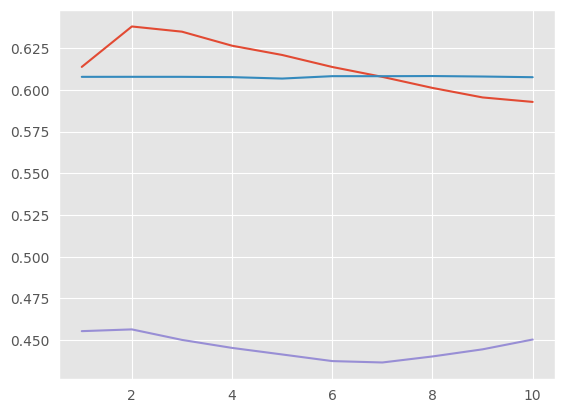

In [48]:
sns.lineplot(x=plot_x,y=human_y)
sns.lineplot(x=plot_x,y=random_y)
sns.lineplot(x=plot_x,y=fish_y)

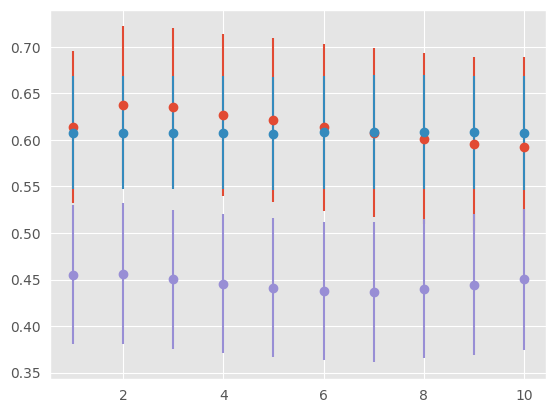

In [47]:

fig,ax=plt.subplots()
ax.errorbar(plot_x,human_y,yerr=human_std*0.5,fmt='o')
ax.errorbar(plot_x,random_y,yerr=random_std*0.5,fmt='o')
ax.errorbar(plot_x,fish_y,yerr=fish_std*0.5,fmt='o')



plt.show()

In [9]:
%matplotlib qt
sns.histplot(data=cleanedhumanseqs,x="Sequence Length",stat='percent',common_norm=False,kde=True,label='Human',bins=1000)
sns.histplot(data=humanseqs,x="Sequence Length",stat='percent',common_norm=False,kde=True,label='old Human',bins=1000)
#sns.histplot(data=gcadjdlseqs,x="Sequence Length",stat='percent',common_norm=False,kde=True,label='Random',bins=150)
plt.legend()
plt.xlim([0,2000])
plt.show()

ImportError: Cannot load backend 'QtAgg' which requires the 'qt' interactive framework, as 'headless' is currently running

In [ ]:
%matplotlib qt

sns.histplot(cleanedhumanseqs,x="GC Content",label='new',stat='percent',common_norm=False,bins=100)
sns.histplot(humanseqs,x="GC Content",label='old',stat='percent',common_norm=False,bins=100)
plt.legend()
plt.show()

In [ ]:
print(cleanedhumanseqs['GC Content'].median())
print(humanseqs['GC Content'].median())

In [ ]:
#MFE
%matplotlib qt
fig5, axs5 = plt.subplots(1,2,layout='constrained',sharex=True,sharey=True,figsize=(10,5))
sns.scatterplot(cleanedhumanseqs,x="Sequence Length",y="MFE",ax=axs5[0],label='Human',s=10,color='#448FA3')
sns.scatterplot(humanseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='old Human',s=10,color='#448FA3')
#sns.scatterplot(gc50dlseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='Random GC 50',s=10,color='#448FA3')
#sns.scatterplot(gcadjdlseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='Random GC adjusted',s=10,color='#0197F6')
sns.lineplot(x=x,y=-0.42*x,ax=axs5[0],color='#D7263D')
sns.lineplot(x=x,y=-0.42*x,ax=axs5[1],color='#D7263D')

In [ ]:
fig6, axs6 = plt.subplots(1,2,layout='constrained',sharex=True,sharey=True,figsize=(10,5))
sns.histplot(x=humanseqs["MFE"]/humanseqs["Sequence Length"],ax=axs6[0],stat='probability',label='Human')
sns.histplot(x=cleanedhumanseqs["MFE"]/cleanedhumanseqs["Sequence Length"],ax=axs6[1],stat='probability',label='old Human')
for ax in axs6:
    ax.set_xlabel('MFE per bp')
    ax.legend()

In [ ]:
%matplotlib qt
fig,axs = plt.subplots(nrows=1, ncols=2,sharey=True,layout='constrained' )
im1= axs[0].hist2d(gc50seqs['GC Content'],gc50seqs['all uORFs'],norm=colors.LogNorm(),cmap='inferno',bins=10)
im2= axs[1].hist2d(gcadjseqs['GC Content'],gcadjseqs['all uORFs'],norm=colors.LogNorm(),cmap='inferno',bins=10)
axs[0].set_title("50% GC Content")
axs[1].set_title("60.81% GC Content")
#fig.colorbar(im1[3],ax=axs[0])
fig.colorbar(im2[3],ax=axs[1])
fig.suptitle('GC Content vs uORF counts',fontsize=14)
plt.show()

In [ ]:
sns.violinplot(data=counts,x='Group',y='all uORFs');
plt.ylim(0,100)
plt.show()

In [ ]:
%matplotlib qt
im3=sns.histplot(x=counts["all ouORFs"],hue=counts["Group"],multiple="dodge",binwidth=0.4)
im3.set_yscale('log')
im3.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
im3.set_xlabel("ouORFs")
plt.title('ouORFs by Group')
plt.show()

In [ ]:
%matplotlib qt
fig2, axs2=plt.subplots(1,2,layout='constrained',sharey=True,sharex=True,figsize=(10,5) )
sns.histplot(x=gcadjdlseqs["ACG_uORFs"],stat='probability',bins=60,ax=axs2[0],color='#0197F6',discrete=True,common_norm=False)
sns.histplot(x=humanseqs["ACG_uORFs"],stat='probability',bins=60,ax=axs2[0],color='#D7263D',discrete=True,common_norm=False)
sns.histplot(x=gcadjdlseqs["ACG_frame1_uORFs"],ax=axs2[1],stat='probability',bins=60,label='Random',color='#0197F6',discrete=True,common_norm=False)
sns.histplot(x=humanseqs["ACG_frame1_uORFs"],ax=axs2[1],stat='probability',bins=60,label='Human',color='#D7263D',discrete=True,common_norm=False)


for ax in axs2:
        #ax.set_yscale('log')
        ax.set_xlabel("")
        ax.set_xlim(0,20)
        ax.set_xticks([0,5,10,15,20])
        ax.minorticks_on()
axs2[0].set_title("All frames")
axs2[1].set_title("First frame")

plt.legend(loc='upper right')
fig2.suptitle('Human ACG uORFs in all reading frames',fontsize=14)
plt.show()

In [ ]:
%matplotlib qt
fig3, axs3 =plt.subplots(2,1,layout='tight',sharey=True)
#sns.histplot(x=gc50seqs['AUG_max_uORF_length'],stat="probability",ax=axs3[0,0])
#sns.histplot(x=gcadjseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[0,1])
sns.histplot(x=humanseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[0],binwidth=1)
sns.histplot(x=gcadjdlseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[1],label='GC adjusted',binwidth=1)
sns.histplot(x=gc50dlseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[1],label='GC 50',binwidth=1)

for ax in axs3:
    ax.minorticks_on()
    ax.set_xlabel("")
    ax.set_xlim(0,1000)
        #ax.set_xscale('log')
#axs3[0,0].set_title("Random GC=50")
#axs3[0,1].set_title("Random GC adjusted")

axs3[0].set_title("Human")
axs3[1].set_title("Random")
axs3[1].legend(loc='upper right')
fig3.suptitle("Length distribution of uORFs",fontsize=14)
#fig3.delaxes(axs3[1,0])
plt.show()

In [ ]:
%matplotlib qt
hue_order=['Random_dl_gc50','Random_dl_gc_adjusted']
im4= sns.histplot(lengthdistributed,x='ACG_uORFs',hue='Group',hue_order=hue_order,discrete=True)
im4.set_xscale('log')
plt.show()

In [ ]:
#overlapping uORFs in allen reading Frames
fig2, axs2=plt.subplots(1,2,layout='constrained',sharey=True,sharex=True,figsize=(10,5) )
sns.histplot(x=humanseqs["GUG_uORFs"],multiple="dodge",ax=axs2[0],bins=30)
sns.histplot(x=humanseqs["GUG_frame3_uORFs"],multiple="dodge",ax=axs2[1],legend=False,bins=20,label='Frame 3',kde=True)
sns.histplot(x=humanseqs["GUG_frame2_uORFs"],multiple="dodge",ax=axs2[1],legend=False,bins=20,label='Frame 2')
sns.histplot(x=humanseqs["GUG_frame1_uORFs"],multiple="dodge",ax=axs2[1],legend=False,bins=20,label='Frame 1')
for ax in axs2:
        #ax.set_yscale('log')
        ax.set_xlabel("")
axs2[0].set_title("Alle Frames")
axs2[1].set_title("Einzelne Frames")

plt.legend(loc='upper right')
fig2.suptitle('uORFs in all reading frames',fontsize=14)
plt.show()

In [ ]:
lengthdistributed=pd.concat([humanseqs,randomseqs],axis=0)
lengthdistributed

In [ ]:
%matplotlib qt
sns.histplot(data=humanseqs,x="ACG_ouORFs",stat="percent",discrete=True,bins=100,common_norm=False,label="Human")
sns.histplot(data=gcadjdlseqs,x="ACG_ouORFs",stat="percent",discrete=True,bins=100,common_norm=False,label="Random")

#plt.yscale("log")
#plt.xscale("log")
plt.xlim([0,1,2,3])
plt.ylim([0,60])
plt.legend(loc="upper right")
plt.show()

In [ ]:
%matplotlib qt
ax=sns.violinplot(data=counts, x="GC Content",y="Group",order=['Human','Random_dl_gc_adjusted','Random_dl_gc50','Random_gc_adjusted','Random_gc50'])
ax.set_xlim([0,1])
#plt.yticks(labels=['Human','','Random_dl_gc50','Random_gc_adjusted','Random_gc50'])
#ax.set_xticks([0,1,2,3,4])
plt.show()

In [ ]:
%matplotlib qt
sns.histplot(gcadjseqs,x="MFE",stat='probability',label='Random gc adjusted',bins=100,common_norm=False,color='#19647E')
sns.histplot(gc50seqs,x="MFE",stat='probability', label='Random gc 50',bins=100,common_norm=False,color='#87B6A7')
sns.histplot(human160seqs,x="MFE",stat='probability',label='Human',bins=100,common_norm=False,color='#F7D08A')
plt.legend()
plt.title(" MFE of Human and Randomly generated 160nt long 5'UTRs ")
plt.show()

In [ ]:
interestingseqs=pd.concat([humanseqs,fishseqs,gcadjdlseqs],axis=0)
interestingseqs

In [ ]:
sns.histplot(interestingseqs,x="AUG_frame1_ouORFs",hue="Group",stat='probability',binwidth=0.25,multiple='dodge',common_norm=False)
#plt.legend()
plt.xticks([0,1])
plt.ylim([0,1])

plt.show()

In [ ]:
len(humanseqs.loc[humanseqs["AUG_frame1_ouORFs"]==0])/len(humanseqs)

In [ ]:
fig5, axs5 = plt.subplots(1,2,layout='constrained',sharex=True,sharey=True,figsize=(10,5))
sns.scatterplot(humanseqs,x="Sequence Length",y="MFE",ax=axs5[0],label='Human')
sns.scatterplot(gc50dlseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='Random')
plt.savefig('data/MFE.png')

In [ ]:
seqs = []
seqIDs = []
for seq_record in SeqIO.parse("data/gencode_5utrs_human_cleaned.fa", "fasta"):
    seqs.append(str(seq_record.seq))
    seqIDs.append(seq_record.id)
seqs = np.vstack((np.array(seqIDs), np.array(seqs))).T
humangroup = np.array([['Human'] * len(seqs)])
seqs = np.concatenate((seqs, humangroup.T), axis=1)  #!!!!

In [ ]:
gcchains=src.rna_analysis.GC_dinucleotides(seqs)
gcchains

In [ ]:
src.human_sequences.delDupes(cleanedhumanseqs)

In [ ]:
rightseqs=list(cleanedhumanseqs[:,0])
allseqs=list(humanseqs.index)

In [ ]:
wrongseqs=[]
for i in allseqs:
    if i in rightseqs:
        pass
    else:
        wrongseqs.append(i)
        
len(wrongseqs)

In [ ]:
with open("data/wrongseqIDs.json",'w') as f:
    json.dump(wrongseqs,f)

In [ ]:
print(82954-43419)

In [ ]:
corr_mfe_seqs

In [ ]:
new_dataset=pd.merge(corr_mfe_seqs.reset_index(),corr_seqs.reset_index())
new_dataset.set_index('SeqID',inplace=True)

In [ ]:
new_dataset

In [ ]:
new_dataset.to_csv("data/new_dataset.csv")

In [ ]:
x=0
for seq in dataset['Sequence']:
    x+=1
    print(type(seq))
    if x>=10:
        break

In [ ]:
quotient, remainder = divmod(325,200)


In [ ]:
binints=[quotient + 1] * remainder + [quotient] * (200 - remainder)
print(binints)
len(binints)

In [ ]:
l=[(0,1),(1,23),(4000,3219)]
print(*l)

In [ ]:
def substringcount(ini_str,sub_str):



    res = sum([1 for i in range(len(ini_str)-len(sub_str)+1) if ini_str[i:i+len(sub_str)] == sub_str])

    return res
#This code is contributed by Edula Vinay Kumar Reddy

        

In [ ]:
randomstring="bababaaababaabaababbabbbababababbabbbabbaaabbabababababababbabbababababababbbabbababbababbabaaabababbbabbabbabbb"
pool=['a','b']
counter=0
for base1 in pool:
    for base2 in pool:
        counter+=substringcount(randomstring,base1+base2)
print(counter,len(randomstring))


In [ ]:
randomseq={"Sequence":["AGCGAGCGAGCGAGUAGUGUCUUCGAUUAC"]}
count=substringcount(randomseq["Sequence"][0],"A")
print(count/len(randomseq["Sequence"][0]))

In [ ]:
mockdf=pd.DataFrame({"Sequence":[np.array([1,2,3]),np.array([4,5,6]),np.array([7,8,9]),np.array([10,11,12])]})
mocktpl=tuple(mockdf["Sequence"])

print(np.vstack(mocktpl))
mockmean=np.mean(mocktpl,axis=0)
print(mockmean)

In [ ]:
result=src.rna_analysis.markov_matrix(humanseqs)

In [ ]:
#mat1=np.matmul(result[2],result[2])
mat1=result[2]
print(mat1)

In [ ]:
np.save("data/human_matrix.npy",mat1)

In [6]:
liste1=np.array([1,2,3])
liste2=np.array([4,5,6])
arr1=np.vstack((liste1,liste2))

In [40]:
mockstd=np.std(arr1,axis=0)
mockmean=np.mean(arr1,axis=0)
x=[1,2,3]

<ErrorbarContainer object of 3 artists>

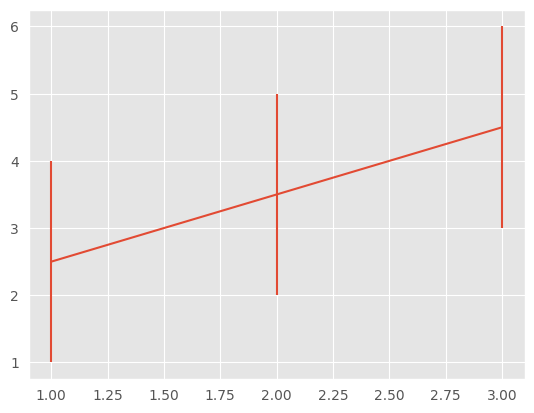

In [44]:
plt.errorbar(x,mockmean,yerr=mockstd)


In [2]:
for i in range(0,10):
    if i==2:
        continue
    print(i)

0
1
3
4
5
6
7
8
9


In [2]:
gtf= pr.read_gtf("data/Homo_sapiens.GRCh38.113.gtf")
gtf_df= gtf.df
#print(gtf_df.columns)
print(gtf_df[gtf_df["Feature"]=='five_prime_utr'])

KeyboardInterrupt: 

In [6]:
fputrs=gtf_df[gtf_df['Feature']=='five_prime_utr']
yeastseqs_raw=src.human_sequences.readFASTA('data/Saccharomyces_cerevisiae.R64-1-1.dna.toplevel.fa','yeast')
print(yeastseqs_raw)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
Gcount=0
Ccount=0
Acount=0
Ucount=0
length=0
for seq in humanseqs["Sequence"]:
    Gcount+=seq.count('G')
    Ccount+=seq.count('C')
    Acount+=seq.count('A')
    Ucount+=seq.count('U')
    length+=len(seq)
G=Gcount/length
C=Ccount/length
A=Acount/length
U=Ucount/length


In [6]:
with open('data/mononucleotides.json','w') as outfile:
    json.dump([A,C,G,U],outfile)